In [11]:

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


In [42]:
dataTrain = pd.read_csv('../../tripleTrain42702.csv')
dataTest = pd.read_csv('../../tripleTest42702.csv')

In [43]:
16*71

1136

In [44]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2]
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2]
# del dataTest
testNum = len(X_test)


In [45]:
#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1).astype('float32')
X_test = X_test.reshape(testNum,16,71,1).astype('float32')

y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
print(y_train[0:5], y_test[0:5])

#one-hot encode target column
y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)
y_test[0]

[0.0 0.0 1.0 1.0 0.0] [1.0 1.0 1.0 1.0 1.0]


array([0, 1])

In [46]:
print(y_train[0:5], y_test[0:5])

[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]] [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [47]:
type(X_train[0][0][0][0])

numpy.float32

In [48]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense( 16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
# model.add(Softmax())
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('Weight/selected CNN on (-1, +1) DDI-Train of 42702Pair_5_epoch.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 68, 128)       2176      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 65, 32)        65568     
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 62, 8)          4104      
                                                                 
 flatten_2 (Flatten)         (None, 3472)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                222272    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 16)               

In [49]:
##plotting model
plot_model(model,show_shapes = True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
# #### train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)
# history = model.fit(X_train, y_train, epochs=1)

Epoch 1/15
1201/1201 [==============================] - 241s 200ms/step - loss: 0.3907 - accuracy: 0.8266 - val_loss: 0.3025 - val_accuracy: 0.8642
Epoch 2/15
1201/1201 [==============================] - 248s 206ms/step - loss: 0.2690 - accuracy: 0.8799 - val_loss: 0.2570 - val_accuracy: 0.8927
Epoch 3/15
1201/1201 [==============================] - 249s 207ms/step - loss: 0.2195 - accuracy: 0.9090 - val_loss: 0.2072 - val_accuracy: 0.9178
Epoch 4/15
1201/1201 [==============================] - 237s 198ms/step - loss: 0.1823 - accuracy: 0.9259 - val_loss: 0.1904 - val_accuracy: 0.9241
Epoch 5/15
1201/1201 [==============================] - 211s 176ms/step - loss: 0.1582 - accuracy: 0.9378 - val_loss: 0.1741 - val_accuracy: 0.9330
Epoch 6/15
1201/1201 [==============================] - 200s 167ms/step - loss: 0.1394 - accuracy: 0.9455 - val_loss: 0.1648 - val_accuracy: 0.9403
Epoch 7/15
1201/1201 [==============================] - 202s 168ms/step - loss: 0.1232 - accuracy: 0.9513 - val_

In [51]:
### Saveing the Model
model.save_weights('Weight/cnnSelection42702(1and-1)_15_epoch.h5')

In [52]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
print(predit[:4])

134/134 [==============================] - 3s 19ms/step
[[1.9850025e-04 9.9831641e-01]
 [2.5755703e-03 9.8757845e-01]
 [3.0381556e-03 9.8322791e-01]
 [1.2643028e-03 9.9254328e-01]]


In [53]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.9723476834843064 0.9912861778066191


In [1]:
# history.history

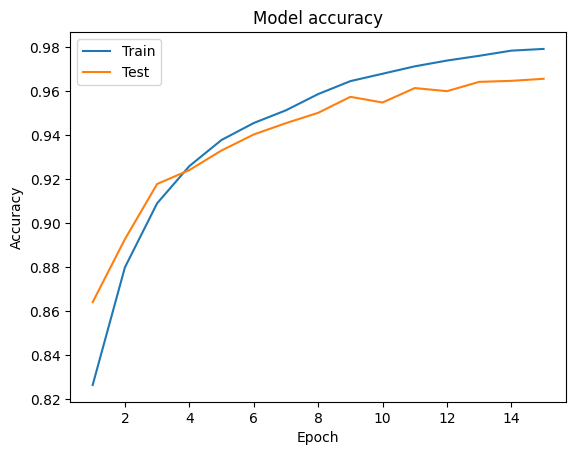

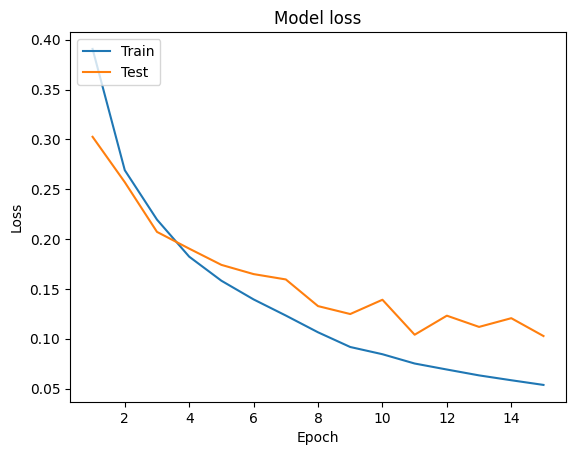

In [60]:
# Plot training & validation accuracy values
plt.plot(list(range(1,16)),history.history['accuracy'])
plt.plot(list(range(1,16)),history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(list(range(1,16)),history.history['loss'])
plt.plot(list(range(1,16)),history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# # predit
# predit[:,0].shape 

In [61]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)
len(predicts)

4270

In [62]:
predicts1 = []
e = d = z = 0

for a,b in predit:
    if a >=0.90:
        predicts1.append(0)
        d += 1
    elif b>=0.95:
        predicts1.append(2)
        e += 1
    elif a<=0.05 and b<=0.1:
        predicts1.append(1)
        z += 1
print('degrassive', d, 'enhancive', e, 'zeros', z)
print("""
Epoch04: degrassive 224 enhancive 2939 zeros 40
Epoch05: degrassive 280 enhancive 2823 zeros 39
Epoch06: degrassive 233 enhancive 2879 zeros 79
Epoch07: degrassive 203 enhancive 2926 zeros 134
Epoch08: degrassive 224 enhancive 2895 zeros 180
Epoch09: degrassive 191 enhancive 2856 zeros 191
Epoch10: degrassive 189 enhancive 2821 zeros 246
Epoch11: degrassive 164 enhancive 2581 zeros 235
Epoch12: degrassive 166 enhancive 2454 zeros 266
""")

degrassive 625 enhancive 2544 zeros 0

Epoch04: degrassive 224 enhancive 2939 zeros 40
Epoch05: degrassive 280 enhancive 2823 zeros 39
Epoch06: degrassive 233 enhancive 2879 zeros 79
Epoch07: degrassive 203 enhancive 2926 zeros 134
Epoch08: degrassive 224 enhancive 2895 zeros 180
Epoch09: degrassive 191 enhancive 2856 zeros 191
Epoch10: degrassive 189 enhancive 2821 zeros 246
Epoch11: degrassive 164 enhancive 2581 zeros 235
Epoch12: degrassive 166 enhancive 2454 zeros 266



In [63]:
# max(list((dataTest.values[:,2]+1)/2))

[[ 824   51]
 [  96 3299]]
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       920
         1.0       0.97      0.98      0.98      3350

    accuracy                           0.97      4270
   macro avg       0.96      0.94      0.95      4270
weighted avg       0.97      0.97      0.97      4270



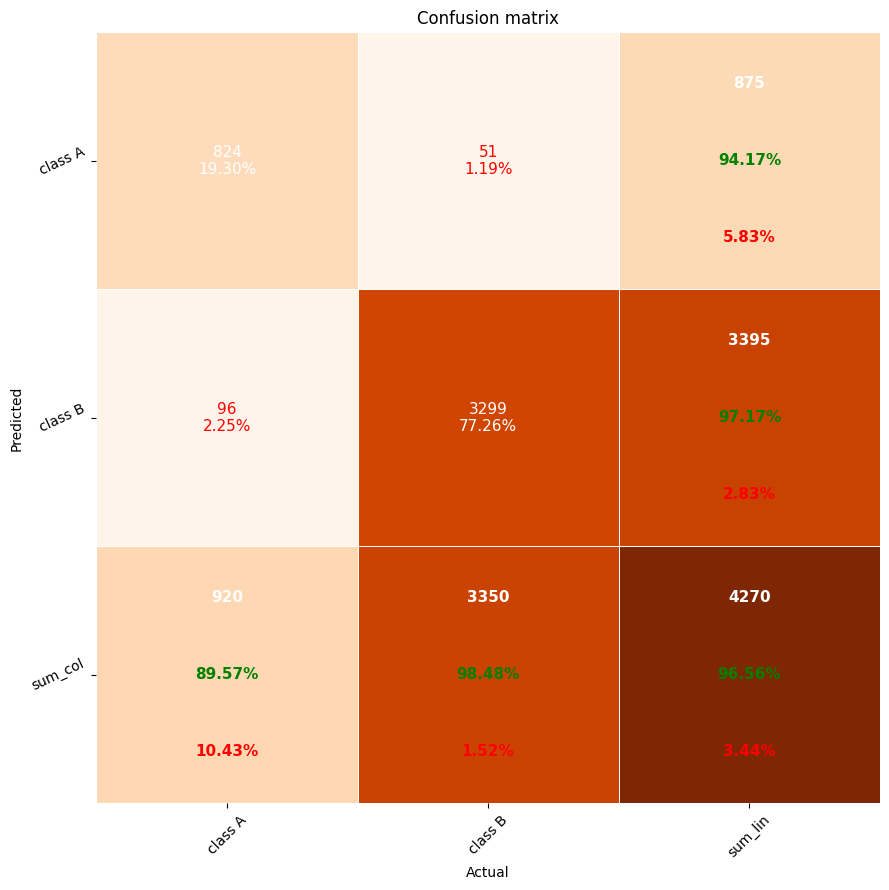

In [64]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)/2))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)/2),list(predicts))
print(CR)
# print(145/4702)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)/2), list(predicts))


In [65]:
print(pd.DataFrame(predit))

             0         1
0     0.000199  0.998316
1     0.002576  0.987578
2     0.003038  0.983228
3     0.001264  0.992543
4     0.008871  0.946963
...        ...       ...
4265  0.000399  0.995288
4266  0.055734  0.897965
4267  0.151035  0.714697
4268  0.000162  0.997962
4269  0.000864  0.992555

[4270 rows x 2 columns]


<Axes: ylabel='Density'>

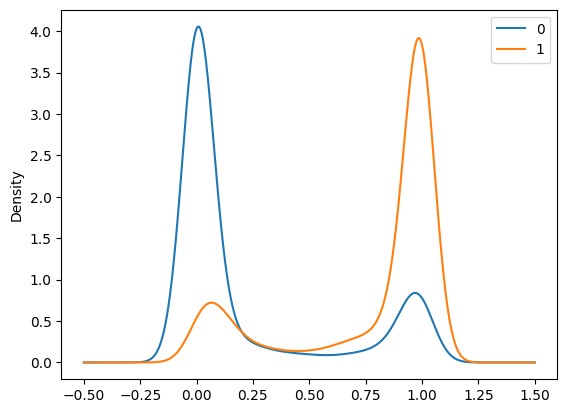

In [66]:
pd.DataFrame(predit).plot.density()

<Axes: ylabel='Density'>

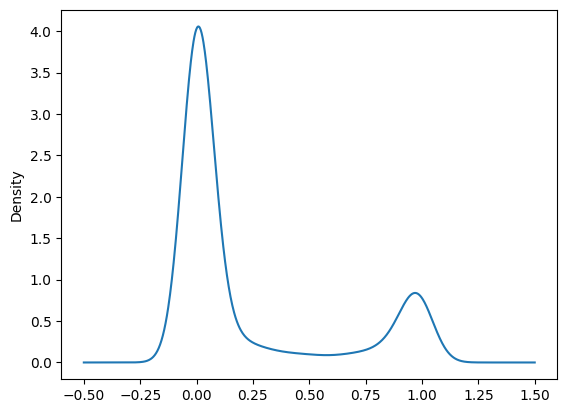

In [67]:
pd.DataFrame(predit).iloc[:,0].plot.density()

<Axes: ylabel='Density'>

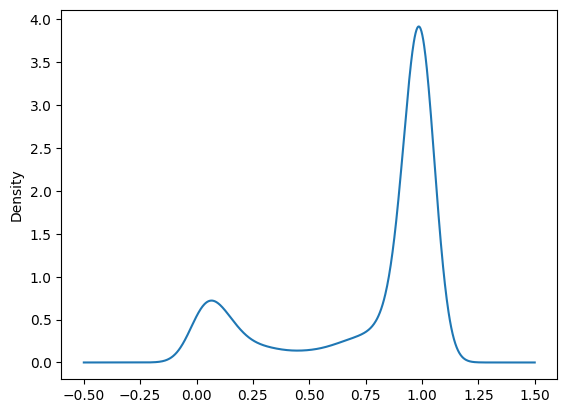

In [68]:
pd.DataFrame(predit).iloc[:,1].plot.density()

C:\Users\Akhod\AppData\Local\Temp\ipykernel_16104\4200795804.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False,


Text(0, 0.5, 'frequency distribution')

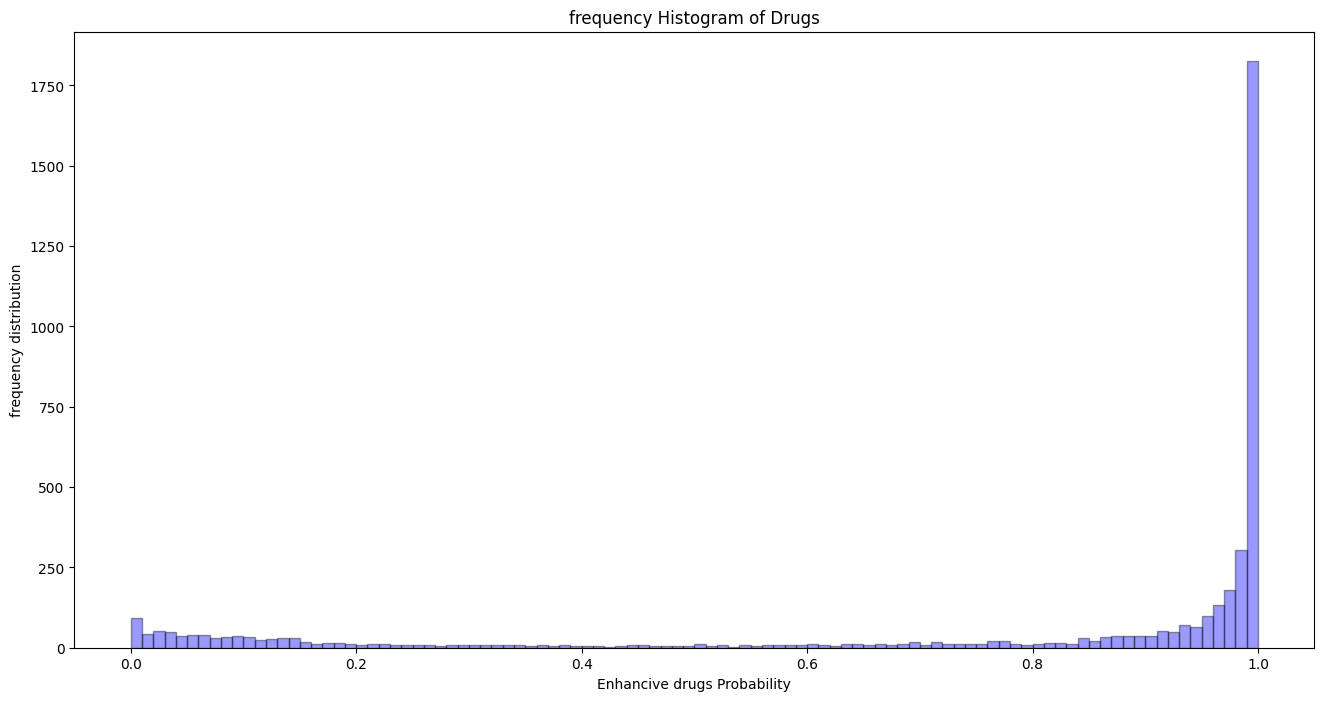

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')


C:\Users\Akhod\AppData\Local\Temp\ipykernel_16104\3796715116.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False,


Text(0, 0.5, 'frequency distribution')

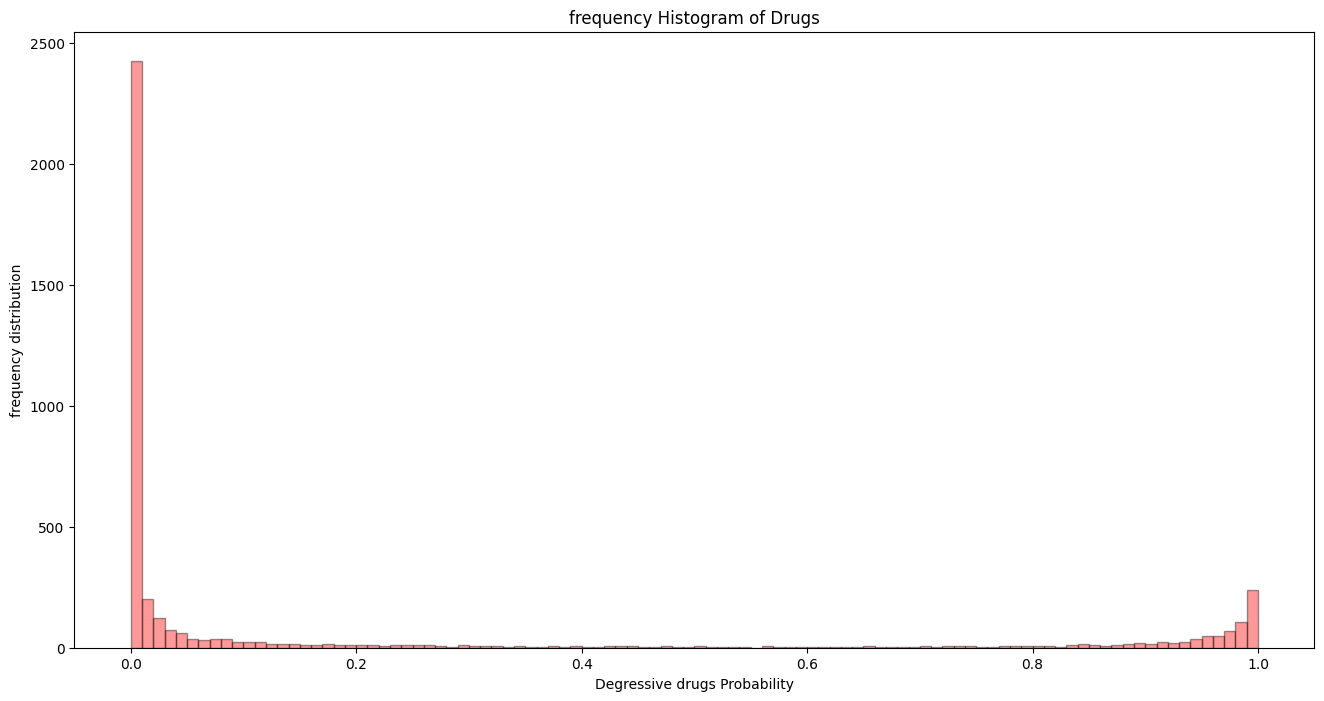

In [70]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')

C:\Users\Akhod\AppData\Local\Temp\ipykernel_16104\1026176618.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False,
C:\Users\Akhod\AppData\Local\Temp\ipykernel_16104\1026176618.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(pr

Text(0, 0.5, 'frequency distribution')

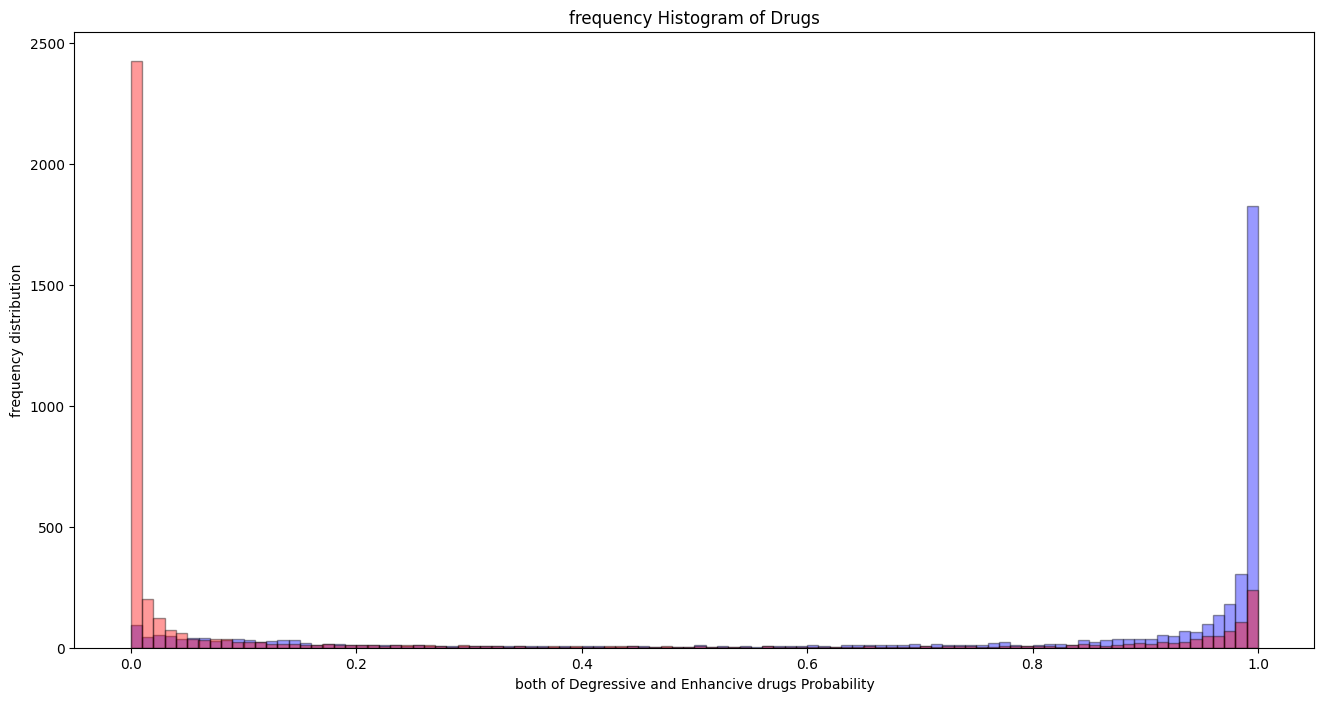

In [71]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')